In [2]:
from manifolds import ellipsoid_ground_truth, hyperboloid_ground_truth_a_eql_b
from abby_manifold import Sphere, Torus, Hyperboloid
from abby_curvature import scalar_curvature_est
from manifolds import hyperboloid_ground_truth
import numpy as np

In [9]:
def run_torus(seed):
    N = 5000
    r = 0.375
    R = 1.
    np.random.seed(seed)
    torus, thetas = Torus.sample(N, r, R)
    true_curv_torus = Torus.exact_curvatures(thetas, r, R)
    sce_torus = scalar_curvature_est(2, torus)
    ab_curv_torus = sce_torus.estimate(rmax=np.pi/2)
    return true_curv_torus, ab_curv_torus

In [11]:
true_curvs, ab_curvs = [], []
for i in range(5):
    print(i, 'start')
    true_curv, ab_curv = run_torus(i * 34)
    true_curvs.append(true_curv)
    ab_curvs.append(ab_curv)
    print(i, 'finish')

0 start
computed Rdist
computed density
computed nearest neighbor matrices
0 finish
1 start
computed Rdist
computed density
computed nearest neighbor matrices
1 finish
2 start
computed Rdist
computed density
computed nearest neighbor matrices
2 finish
3 start
computed Rdist
computed density
computed nearest neighbor matrices
3 finish
4 start
computed Rdist
computed density
computed nearest neighbor matrices
4 finish


In [15]:
import numpy as np
corrs = []
assert len(true_curvs) == len(ab_curvs)
for i in range(len(true_curvs)):
    corrs.append(np.corrcoef(true_curvs[i], ab_curvs[i])[0, 1])
print("torus")
print(corrs)
print("mean:", np.mean(corrs))
print("std:", np.std(corrs))

torus
[0.9945530033745643, 0.9945025599401106, 0.9943777790237298, 0.9943930816673924, 0.9943254694132992]
mean: 0.9944303786838192
std: 8.41554457620325e-05


In [ ]:
def run_hyperboloid(seed):
    N = 5000
    np.random.seed(seed)
    hyperboloid = Hyperboloid.sample(N)
    true_curv_hyperboloid = Hyperboloid.S(hyperboloid[:, 2])
    true_curv_hyperboloid2 = hyperboloid_ground_truth()
    sce_hyperboloid = scalar_curvature_est(2, hyperboloid)
    ab_curv_hyperboloid = sce_hyperboloid.estimate(rmax=np.pi/2)
    return true_curv_hyperboloid, ab_curv_hyperboloid

In [2]:
N = 5000
# np.random.seed(seed)
hyperboloid = Hyperboloid.sample(N)
true_curv_hyperboloid = Hyperboloid.S(hyperboloid[:, 2])
true_curv_hyperboloid2 = hyperboloid_ground_truth_a_eql_b(hyperboloid, 2, 1)
# sce_hyperboloid = scalar_curvature_est(2, hyperboloid)
# ab_curv_hyperboloid = sce_hyperboloid.estimate(rmax=np.pi/2)

True
a =  2
c =  1
B =  2


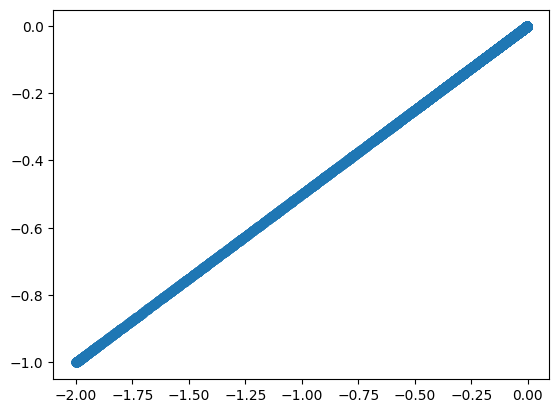

In [3]:
import matplotlib.pyplot as plt
plt.scatter(true_curv_hyperboloid, np.array(true_curv_hyperboloid2))

In [4]:
true_curv_hyperboloid

array([-0.04446814, -0.2708004 , -0.01885564, ..., -0.0191848 ,
       -0.01263043, -0.24374013])

In [5]:
np.array(true_curv_hyperboloid2)

array([-0.02223407, -0.1354002 , -0.00942782, ..., -0.0095924 ,
       -0.00631521, -0.12187006])

In [31]:
hyperboloid.shape

(16140, 3)